In [61]:
import torch
import yolov5
from PIL import Image
import numpy as np

model = torch.hub.load("ultralytics/yolov5", "yolov5s", autoshape=False)

model_pt = yolov5.load('yolov5s.pt')

Using cache found in C:\Users\Devon/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-19 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)

YOLOv5  2023-5-15 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


tensor([[3.09338e+02, 1.98445e+02, 4.10504e+02, 2.97610e+02, 6.44562e-01, 5.50000e+01],
        [1.80910e+02, 1.80324e+02, 4.70854e+02, 4.61102e+02, 4.74366e-01, 1.10000e+01],
        [1.78234e+02, 1.81822e+02, 4.75881e+02, 4.54711e+02, 2.96353e-01, 5.50000e+01]], device='cuda:0')


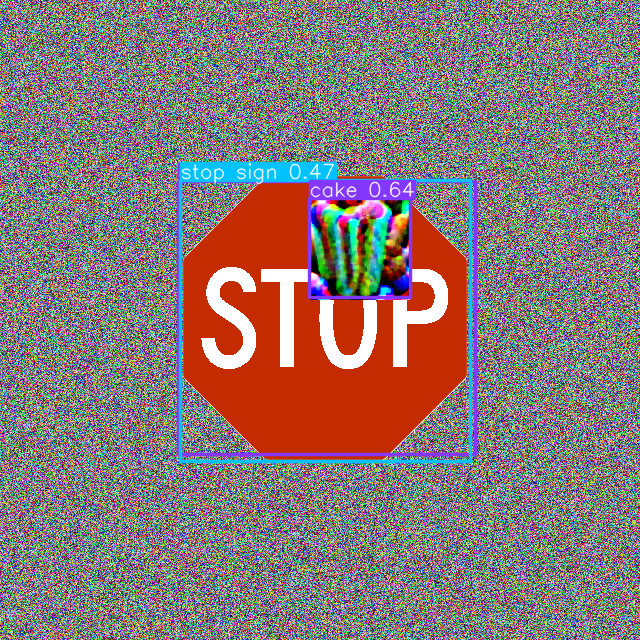

In [62]:
img_path = "C:\\Users\\Devon\\Project\\NewPatchGen\\outputs\\2023-09-25\\17-04-33\\Patch\\final_patched.png"
results = model_pt(img_path)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

print(predictions)

# show detection bounding boxes on image
results.show()

In [63]:
num_cat = 80
target_ID = 11

img = Image.open(img_path)

# convert to np
img_np = np.array(img)
img_np = img_np.transpose(2, 0, 1)
img_np = img_np.astype(np.float32) / 255.0
img_np = np.expand_dims(img_np, axis=0)

# convert to tensor
x = torch.from_numpy(img_np).to(device='cuda:0')
print(x.shape)


torch.Size([1, 3, 640, 640])


In [64]:
outputs = model(x)

if len(outputs) == 3:
    for i in range(len(outputs)):
        # reshape outputs to [batch, grid, 5 + num classes]
        shape = outputs[i].shape
        outputs[i] = outputs[i].reshape(
            shape[0], shape[1] * shape[2] * shape[3], shape[4])
    all_outputs = torch.cat(outputs, axis=1)
else:
    all_outputs = outputs[0]
    
print(all_outputs.shape)
print(all_outputs[0,3,0:5])

class_confidence = all_outputs[:, :, 5:5 + num_cat]

print(class_confidence.shape)

objectness = all_outputs[:, :, 4]
max_objectness = torch.max(objectness, dim=1)[0]
print("max_objectness")
print(max_objectness)

class_confidence = class_confidence[:, :, 11]

max_prob = torch.max(class_confidence, dim=1)[0]
print("max_prob")
print(max_prob)

final_score = objectness * class_confidence
print(final_score.shape)

max_final_score = torch.max(final_score, dim=1)[0]
print(max_final_score)

torch.Size([1, 25200, 85])
tensor([2.62035e+01, 3.86804e+00, 3.06929e+01, 8.00264e+00, 5.41435e-05], device='cuda:0')
torch.Size([1, 25200, 80])
max_objectness
tensor([0.71844], device='cuda:0')
max_prob
tensor([0.95183], device='cuda:0')
torch.Size([1, 25200])
tensor([0.47437], device='cuda:0')


In [65]:
print(objectness.shape)
print(class_confidence.shape)

torch.Size([1, 25200])
torch.Size([1, 25200])
